# ENTREGABLE 1

INSTRUCCIONES

Realizar la primera fase del análisis exploratorio (limpieza) usando el archivo CSV (dataset_banco.csv) con 45215 filas y 17 columnas.

# 1. El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

#2. El set de datos

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

#3. Una primera mirada al dataset

In [ ]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Lectura
from google.colab import drive
import pandas as pd

drive.mount('/gdrive')

ruta = "/gdrive/My Drive/ejercicios_ml/clasificacion/dataset_banco.csv"
data = pd.read_csv(ruta)

Mounted at /gdrive


In [ ]:
print(data.shape)
data.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [ ]:
# Veamos las variables categóricas y las numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


#4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

## 4.1 Datos faltantes

Comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 45.215. Sin embargo columnas como "job", "marital", "education", "balance", "duration" y "pdays".

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:

In [ ]:
# Eliminar filas con datos faltantes en columnas específicas
data_clean = data.dropna(subset=["job", "marital", "education", "balance", "duration", "pdays"])

# Verificar la nueva forma del conjunto de datos después de eliminar filas
print(data_clean.shape)


(45207, 17)


##4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los vlaores fuesen iguales a 50.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

In [ ]:
# Revisar columnas categóricas con un solo nivel
single_level_cols = [col for col in data_clean.columns if data_clean[col].nunique() == 1]
print("Columnas categóricas con un solo nivel:", single_level_cols)

# Eliminar columnas categóricas con un solo nivel
data_clean = data_clean.drop(columns=single_level_cols)

# Revisar columnas numéricas con un solo valor
single_value_numeric_cols = [col for col in data_clean.select_dtypes(include='number').columns if data_clean[col].nunique() == 1]
print("Columnas numéricas con un solo valor:", single_value_numeric_cols)

# Eliminar columnas numéricas con un solo valor
data_clean = data_clean.drop(columns=single_value_numeric_cols)

# Verificar la nueva forma del conjunto de datos después de eliminar columnas irrelevantes
print(data_clean.shape)


Columnas categóricas con un solo nivel: []
Columnas numéricas con un solo valor: []
(45207, 17)


Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

In [ ]:
# Calcular la desviación estándar de cada columna numérica
std_devs = data_clean.select_dtypes(include='number').std()

# Verificar si todas las desviaciones estándar son diferentes de cero
all_nonzero_std = (std_devs != 0).all()

print("Todas las columnas numéricas tienen desviaciones estándar diferentes de cero:", all_nonzero_std)


Todas las columnas numéricas tienen desviaciones estándar diferentes de cero: True


##4.3 Filas repetidas

In [ ]:
# Identificar filas duplicadas
duplicated_rows = data_clean[data_clean.duplicated()]

# Contar el número de filas duplicadas
num_duplicated_rows = duplicated_rows.shape[0]

# Eliminar filas duplicadas
data_clean = data_clean.drop_duplicates()

print("Número de filas duplicadas:", num_duplicated_rows)
print("Número de filas después de eliminar duplicados:", data_clean.shape[0])


Número de filas duplicadas: 4
Número de filas después de eliminar duplicados: 45203


##4.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.


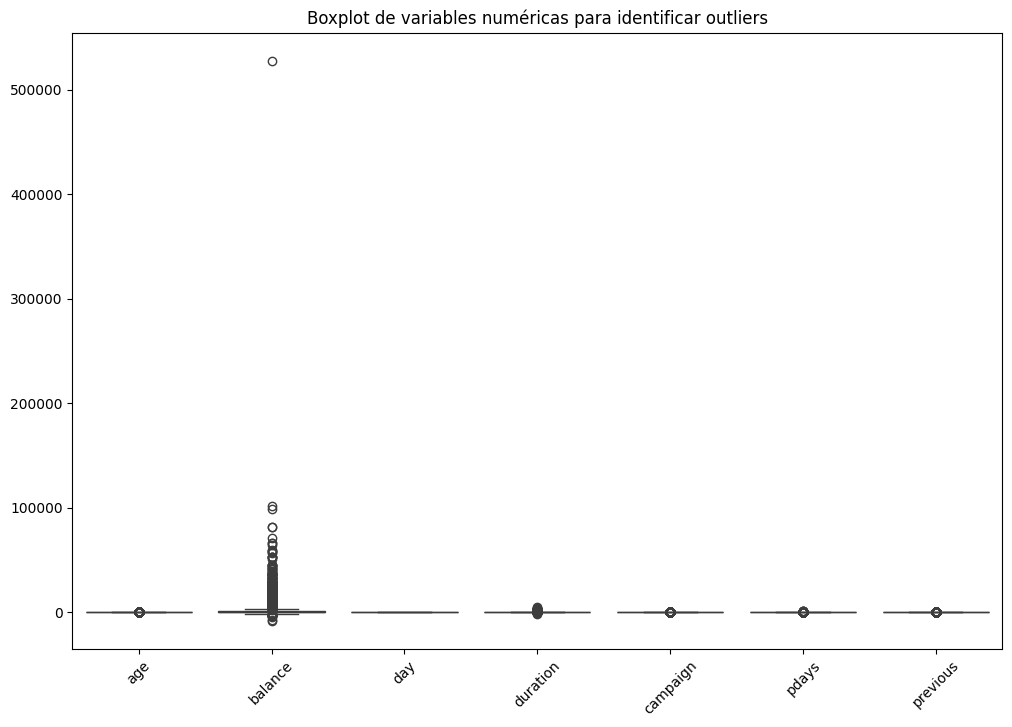

In [ ]:
# Crear subconjunto de datos solo con variables numéricas
numeric_data = data_clean.select_dtypes(include='number')

# Visualización de boxplots para identificar outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_data)
plt.xticks(rotation=45)
plt.title('Boxplot de variables numéricas para identificar outliers')
plt.show()


Análisis por variable:

 1. Age:

La distribución de la edad parece ser normal, con una ligera asimetría hacia la derecha.
Los outliers podrían representar personas con edades muy jóvenes o muy mayores.

 2. Balance: representa el saldo promedio anual por cliente

La distribución del balance parece ser asimétrica hacia la derecha, con una cola larga en los valores altos.

Los outliers podrían representar clientes con un saldo promedio anual muy alto.

 3. Day:

La distribución del día del mes parece ser uniforme, ya que los valores se distribuyen de manera equitativa entre 1 y 31.

No se observan outliers.

 4. Duration:

La distribución de la duración de las llamadas parece ser asimétrica hacia la derecha, con una cola larga en los valores altos.

Los outliers podrían representar llamadas telefónicas muy largas.

 5. Campaign:

La distribución del número de campañas parece ser asimétrica hacia la derecha, con una cola larga en los valores altos.

Los outliers podrían representar clientes que han sido contactados un número muy alto de veces.

 6. Pdays:

La distribución de los días desde el último contacto parece ser bimodal, con dos picos en 0 y en valores negativos.

Los outliers podrían representar clientes que no han sido contactados en un período de tiempo muy largo.

 7. Previous:

La distribución del número de campañas anteriores parece ser asimétrica hacia la derecha, con una cola larga en los valores altos.

Los outliers podrían representar clientes que han sido contactados un número muy alto de veces en campañas anteriores.



##4.5 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles

In [ ]:
# Obtener todas las columnas categóricas
categorical_columns = data_clean.select_dtypes(include=['object']).columns

# Iterar sobre cada columna categórica
for col in categorical_columns:
    # Convertir todos los valores a minúsculas
    data_clean[col] = data_clean[col].str.lower()

    # Identificar subniveles equivalentes
    equivalent_sublevels = {'unk': 'unknown'}  # Define aquí tus subniveles equivalentes

    # Reemplazar subniveles equivalentes
    data_clean[col].replace(equivalent_sublevels, inplace=True)

# Verificar que los subniveles se hayan unificado correctamente
for col in categorical_columns:
    print(f"Valores únicos en la columna '{col}':")
    print(data_clean[col].value_counts())
    print()


Valores únicos en la columna 'job':
job
blue-collar       9729
management        9457
technician        7595
admin.            5166
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
unknown            288
administrative       3
Name: count, dtype: int64

Valores únicos en la columna 'marital':
marital
married     27209
single      12789
divorced     5198
div.            7
Name: count, dtype: int64

Valores únicos en la columna 'education':
education
secondary    23194
tertiary     13300
primary       6850
unknown       1857
sec.             2
Name: count, dtype: int64

Valores únicos en la columna 'default':
default
no     44388
yes      815
Name: count, dtype: int64

Valores únicos en la columna 'housing':
housing
yes    25123
no     20080
Name: count, dtype: int64

Valores únicos en la columna 'loan':
loan
no     37960
yes     7243
Name: count, dtype: int64

Valores únicos e

Todos los subniveles equivalentes, como "unknown" y "UNK", han sido unificados en cada una de las columnas categóricas. Además, se han convertido todos los valores a minúsculas para asegurar una unificación completa y evitar problemas de capitalización.

Ahora, todas las columnas categóricas tienen valores consistentes y equivalentes, lo que facilitará el análisis y la interpretación de los datos.

## Conclusiones

Con estas acciones, hemos preparado el conjunto de datos para el análisis exploratorio, asegurándonos de que esté íntegro y listo para extraer información útil. Ahora podemos proceder con la siguiente fase del análisis para identificar el perfil de los clientes con mayor potencial de conversión.

In [ ]:
data.to_csv(ruta, index=False)